#Examen 1
Lesly Andrea Suárez Sánchez - 177953

##Exercise 1: Datasets
Analyze the follwoing datasets to identify common data problems:

*   Null or missing values
*   Imbalance in class
*   Special characters or symbols
*   Errors in labels

Answer follwing questions:


1.   What problem does each dataset have?
2.   How would you idntify it in Python?
3.   How would you fix each error?
4.   How would this problem affect a ML model?
5.   Which dataset is ready to use?

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#conectar google drive
drive.mount('/content/drive')

Mounted at /content/drive


##Funciones útiles

In [4]:
#Función para regresar valores nulos de la matriz, descripción de los datos y las etiquetas de las calses
def analisis_df(df):
  #Nos regresa si el df tiene valores nulos
  print(df.isnull().sum())
  #Para entender si el dataframe tiene valores extremos
  print(df.describe())

In [5]:
#Función para regresar heatmap de la matriz de correlación de un df
def heatmap_corr(df):
  #df_hm = df.drop('species', axis=1)
  #Calculamos matriz de correlación
  corrMatriz = df.corr()
  sns.heatmap(corrMatriz, cmap='PiYG', annot=True)
  # Añadir título
  plt.title("Heatmap de Matriz de correlación")
  # Mostrar el gráfico
  plt.show()

###Dataset.csv

In [6]:
#Importing dataset
df = pd.read_csv("/content/drive/MyDrive/6to semestre/IAExamen1/data.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [ ]:
analisis_df(df)

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64
              age         sex          cp     oldpeak  num       
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    47.826531    0.724490    2.982993    0.586054    0.360544
std      7.811812    0.447533    0.965117    0.908648    0.480977
min     28.000000    0.000000    1.000000    0.000000    0.000000
25%     42.000000    0.000000    2.000000    0.000000    0.000000
50%     49.000000    1.000000    3.000000    0.000000    0.000000
75%     54.000000    1.000000    4.000000    1.000000    1.000000
max     66.000000    1.000000    4.000000    5.000000    1.000000


In [7]:
#Ver si hay desbalance en una posbilidad de clases
sex_counts = df['sex'].value_counts()

sex_counts

,count
sex,
1,213
0,81


###Dataset1

In [8]:
df1 = pd.read_csv("/content/drive/MyDrive/6to semestre/IAExamen1/data1.csv")

df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1.0,2.0,130,132,0,2.0,185,0,0.0,?,?,?,0
1,29,1.0,2.0,120,243,0,0.0,160,0,0.0,?,?,?,0
2,29,1.0,2.0,140,?,0,0.0,170,0,0.0,?,?,?,0
3,30,0.0,1.0,170,237,0,1.0,170,0,0.0,?,?,6,0
4,31,0.0,2.0,100,219,0,1.0,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1.0,4.0,160,331,0,0.0,94,1,2.5,?,?,?,1
290,54,0.0,3.0,130,294,0,1.0,100,1,0.0,2,?,?,1
291,56,1.0,4.0,155,342,1,0.0,150,1,3.0,2,?,?,1
292,58,0.0,2.0,180,393,0,0.0,110,1,1.0,2,?,7,1


In [ ]:
analisis_df(df1)

age            0
sex           23
cp            23
trestbps      23
chol          10
fbs           13
restecg       31
thalach       31
exang         31
oldpeak       18
slope          0
ca             0
thal           0
num            0
dtype: int64
              age         sex          cp     restecg     oldpeak  num       
count  294.000000  271.000000  271.000000  263.000000  276.000000  294.000000
mean    47.826531    0.741697    3.014760    0.212928    0.609783    0.360544
std      7.811812    0.438511    0.962137    0.454309    0.922967    0.480977
min     28.000000    0.000000    1.000000    0.000000    0.000000    0.000000
25%     42.000000    0.000000    2.000000    0.000000    0.000000    0.000000
50%     49.000000    1.000000    3.000000    0.000000    0.000000    0.000000
75%     54.000000    1.000000    4.000000    0.000000    1.000000    1.000000
max     66.000000    1.000000    4.000000    2.000000    5.000000    1.000000


In [9]:
#Ver si hay desbalance en una posbilidad de clases
sex_counts = df1['sex'].value_counts()

sex_counts

,count
sex,
1.0,201
0.0,70


###Dataset2

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/6to semestre/IAExamen1/data2.csv")

df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0,6.0,0
1,29,1,2,120,243,0,0,160,0,0.0,1,0,6.0,0
2,29,1,2,140,243,0,0,17000,0,0.0,2,0,3.0,0
3,30,0,1,170,237,0,1,170,0,0.0,3,0,6.0,0
4,31,0,2,100,219,0,1,150,0,0.0,4,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,289,0,-167.4,1
290,54,0,3,130,294,0,1,100,1,0.0,290,0,-168.0,1
291,56,1,4,155,342,1,0,150,1,3.0,291,0,-168.6,1
292,58,0,2,180,393,0,0,110,1,1.0,292,0,-169.2,1


In [ ]:
analisis_df(df2)

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64
              age             sex            cp      trestbps          chol  \
count  294.000000      294.000000    294.000000    294.000000    294.000000   
mean    47.826531     3402.085034     71.003401    213.425170    357.431973   
std      7.811812    58321.141956   1166.249918    977.285035   1823.852372   
min     28.000000        0.000000      1.000000     92.000000     85.000000   
25%     42.000000        0.000000      2.000000    120.000000    209.000000   
50%     49.000000        1.000000      3.000000    130.000000    241.500000   
75%     54.000000        1.000000      4.000000    140.000000    281.000000   
max     66.000000  1000000.000000  20000.000000  12000.000000  31500.000000   

              fbs     restecg       thalach       e

In [10]:
#Ver si hay desbalance en una posbilidad de clases
sex_counts = df['sex'].value_counts()

sex_counts

,count
sex,
1,213
0,81


###Dataset3

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/6to semestre/IAExamen1/data3.csv")

df3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0,6.0,0
1,29,1,2,120,243,0,0,160,0,0.0,1,0,6.0,0
2,29,1,2,140,243,0,0,170,0,0.0,2,0,3.0,0
3,30,0,1,170,237,0,1,170,0,0.0,3,0,6.0,0
4,31,0,2,100,219,0,1,150,0,0.0,4,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,289,0,-167.4,1
290,54,0,3,130,294,0,1,100,1,0.0,290,0,-168.0,1
291,56,1,4,155,342,1,0,150,1,3.0,291,0,-168.6,1
292,58,0,2,180,393,0,0,110,1,1.0,292,0,-169.2,1


In [ ]:
analisis_df(df3)

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  294.000000  294.000000  294.000000  294.000000  294.000000  294.000000   
mean    47.826531    0.727891    2.982993  132.608844  251.360544    0.078231   
std      7.811812    0.445804    0.965117   17.601778   71.086156    0.268993   
min     28.000000    0.000000    1.000000   92.000000   85.000000    0.000000   
25%     42.000000    0.000000    2.000000  120.000000  209.000000    0.000000   
50%     49.000000    1.000000    3.000000  130.000000  241.500000    0.000000   
75%     54.000000    1.000000    4.000000  140.000000  281.000000    0.000000   
max     66.000000    1.000000    4.000000  200.000000  603.000000    1.000000   

          restecg     thalach    

In [11]:
#Ver si hay desbalance en una posbilidad de clases
sex_counts = df['sex'].value_counts()

sex_counts

,count
sex,
1,213
0,81


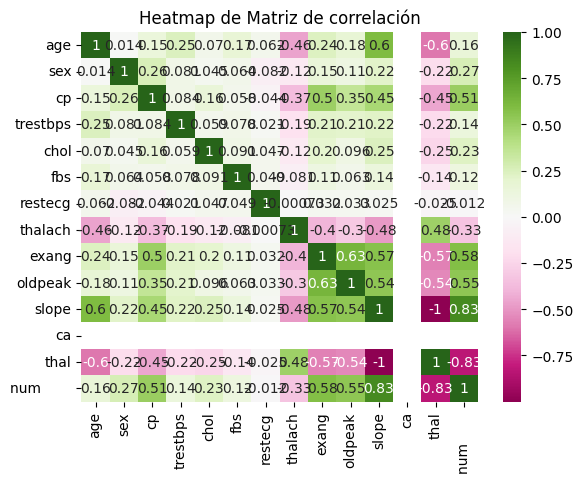

In [ ]:
heatmap_corr(df3)

###Dataset4

In [ ]:
df4 = pd.read_csv("/content/drive/MyDrive/6to semestre/IAExamen1/data4.csv")

df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,245,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [ ]:
analisis_df(df4)

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  294.000000  294.000000  294.000000  294.000000  294.000000  294.000000   
mean    47.826531    0.724490    2.982993  132.642857  247.476190    0.068027   
std      7.811812    0.447533    0.965117   17.625755   66.964851    0.252222   
min     28.000000    0.000000    1.000000   92.000000   85.000000    0.000000   
25%     42.000000    0.000000    2.000000  120.000000  205.250000    0.000000   
50%     49.000000    1.000000    3.000000  130.000000  238.000000    0.000000   
75%     54.000000    1.000000    4.000000  140.000000  278.500000    0.000000   
max     66.000000    1.000000    4.000000  200.000000  603.000000    1.000000   

          restecg     thalach       exang     oldpeak  num         
count  294.00

In [12]:
#Ver si hay desbalance en una posbilidad de clases
sex_counts = df['sex'].value_counts()

sex_counts

,count
sex,
1,213
0,81


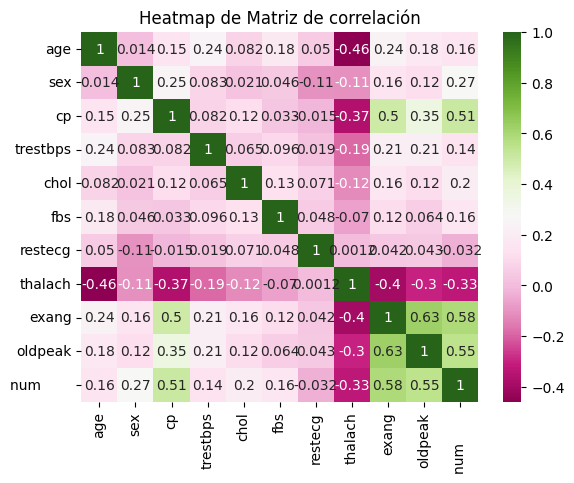

In [ ]:
heatmap_corr(df4)

##Exercise 3: Searches
We have a directed graph that represents a communication network beteen servers. Each node represnts a server, and each edge represents a connection with an associated cost (transmission time in milliseconds). The objective is to find the optimal route from a start server to a destinaditon using search algorithms.

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def plot_graph(graph):
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges with weights to the graph
    for node, edges in graph.items():
        for edge in edges:
            target_node, weight = edge
            G.add_edge(node, target_node, weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold')

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Show the plot
    plt.show()

In [ ]:
#A heuristic approach to find the shortest path from one node to another
#Graph is a dictionary, start and goal are nodes and heuristic is the estimated distances of every node to our goal

def a_star_graph_search(graph, start, goal, heuristic):
    frontier = [] #priority queue for tbe (To be explored) nodes
    heapq.heappush(frontier, (0 + heuristic[start], start)) #we add starting node (heuristic cost, node)
    came_from = {} #dictionary to keep track of optimal path
    cost_so_far = {start: 0} #Dictionary for costs from start node to each node
    visited = set() #keeps track of explored nodes

    #Until frontier is empty we explore according to priority from our priority queue
    while frontier:
        current_cost, current_node = heapq.heappop(frontier)
        #If we find the goal node then we reconstruct the path from stat to goals node and return
        if current_node == goal:
            path = []
            while current_node:
                path.append(current_node)
                current_node = came_from.get(current_node)
            return path[::-1]
        #In case our current node isn't the goal node we add it to visited
        #ensuring we don't explore again
        visited.add(current_node)
        #Explroing neighbors
        for neighbor, cost in graph[current_node]:
            new_cost = cost_so_far[current_node] + cost
            #If the neighbor hasn't been visited and  hasn't been explored yet or a cheaper path to the neighbor is found
            if neighbor not in visited and (neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]):
              #update costs and prioriy in queue
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic[neighbor]
                heapq.heappush(frontier, (priority, neighbor))
                came_from[neighbor] = current_node #update current node as predecessor


    return "No path found :("  # No path found

In [ ]:
graph = {
    'A': [('B', 10), ('C', 15)],
    'B': [('D', 12)],
    'C': [('D', 10)],
    'D': [('E', 5)],
}

# Heuristic values (estimated distance to 'J')
heuristic = {
    'A': 20,
    'B': 15,
    'C': 10,
    'D': 5,
    'E': 0,
}
# Find the path from 'A' to 'J' using 4 Searchs
pathA_star_Graph = a_star_graph_search(graph, 'A', 'E',heuristic)
print("A*Graph Search Path from A to E:", pathA_star_Graph)

pathA_star_Graph = a_star_graph_search(graph, 'B', 'E',heuristic)
print("A*Graph Search Path from B to E:", pathA_star_Graph)

pathA_star_Graph = a_star_graph_search(graph, 'C', 'E',heuristic)
print("A*Graph Search Path from C to E:", pathA_star_Graph)

pathA_star_Graph = a_star_graph_search(graph, 'D', 'E',heuristic)
print("A*Graph Search Path from D to E:", pathA_star_Graph)

A*Graph Search Path from A to E: ['A', 'B', 'D', 'E']
A*Graph Search Path from B to E: ['B', 'D', 'E']
A*Graph Search Path from C to E: ['C', 'D', 'E']
A*Graph Search Path from D to E: ['D', 'E']


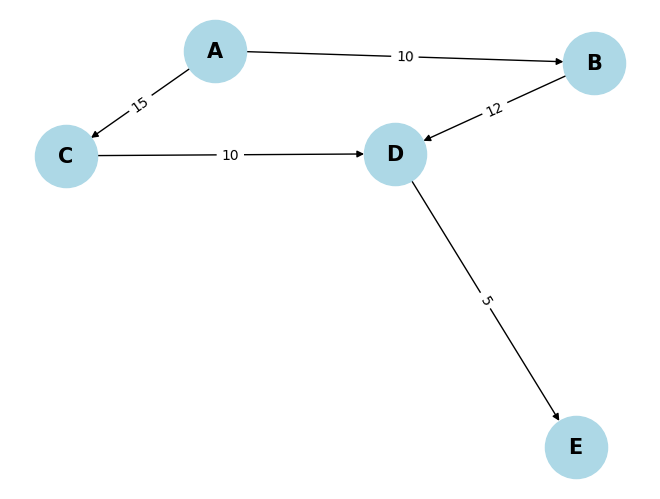

In [ ]:
plot_graph(graph)